# GENRE CLASSIFICATION
## [SPOTIFY TRACKS DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db)


In [8]:
import pandas as pd


#Data Characteristics
spotify_data = pd.read_csv("SpotifyFeatures.csv")
display(spotify_data.head())
display(spotify_data.info())
display(spotify_data.describe())

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

None

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [65]:
#Checking for incomplete data
print("Amount of Null in Data: ", spotify_data.isnull().sum().sum())
print("Amount of N/A in Data: ", spotify_data.isna().sum().sum())

#Factorize columns that are strings
spotify_data_factorized = spotify_data.copy()
spotify_data_factorized['genre'], genre_mapping = pd.factorize(spotify_data_factorized['genre'])
spotify_data_factorized['time_signature'], time_signature_mapping = pd.factorize(spotify_data_factorized['time_signature'])
spotify_data_factorized['mode'], mode_mapping = pd.factorize(spotify_data_factorized['mode'])
spotify_data_factorized['key'], key_mapping = pd.factorize(spotify_data_factorized['key'])



#Deleting Duplicates in data with exact values in track_id
#Spotify will categorize 1 unique song into multiple genres
#We will take the first genre that the song is categorized into
spotify_data_cleansed = spotify_data_factorized.drop_duplicates(subset='track_id', keep='first')
print("Total Songs that were removed due to duplication: ", (spotify_data.shape[0] - spotify_data_cleansed.shape[0]))


print("\nUnique genres: ", genre_mapping)


Amount of Null in Data:  0
Amount of N/A in Data:  0
Total Songs that were removed due to duplication:  55951

Unique genres:  Index(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       'Children's Music', 'Children’s Music', 'Rap', 'Indie', 'Classical',
       'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul',
       'Soundtrack', 'World'],
      dtype='object')


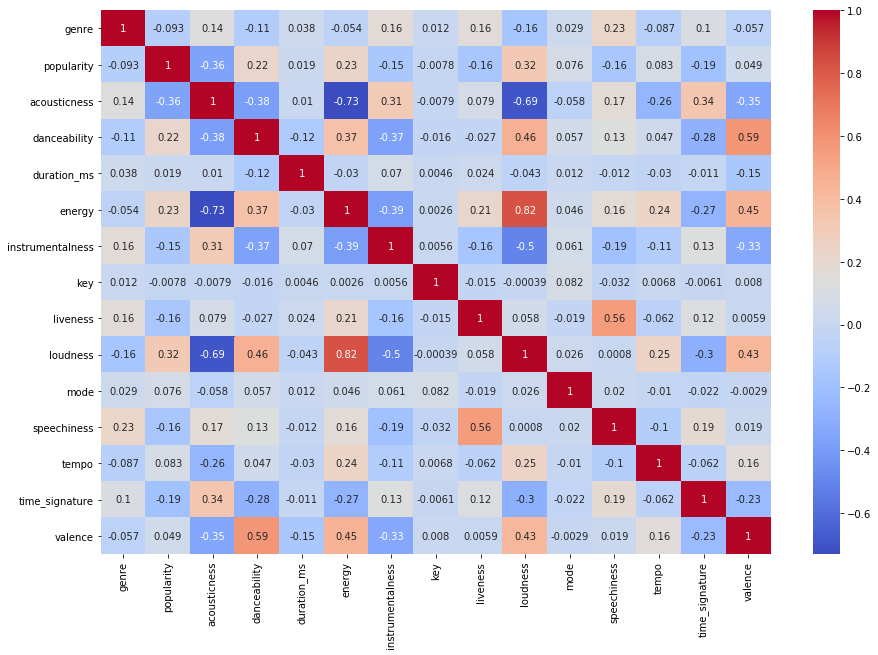

In [67]:
import seaborn as sn
import matplotlib.pyplot as plt
#Find Correlations within data
corr_matric = spotify_data_cleansed.corr()
plt.subplots(figsize=(15,10))
sn.heatmap(corr_matric, annot=True, cmap="coolwarm")
plt.show()

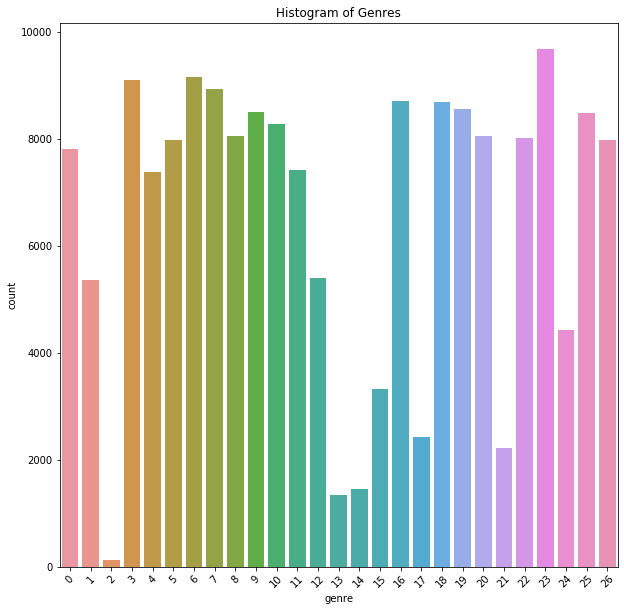

In [68]:
#Bar Chart to show distribution of Genres
plt.subplots(figsize=(10,10))
sn.countplot(spotify_data_cleansed['genre'])
plt.title('Histogram of Genres')
plt.xticks(rotation=45)
plt.show()